# First Preprocessing ---

In [1]:
# ------ IMPORT LIBRARIES ------

import os 
import sys 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
# -------- HANDLING DIRECTORY -------

# parent folder director
parent_dir = Path.cwd().parent

# data directory
data_dir = parent_dir / "data"

# dataset directory
dataset_dir = data_dir / "Loan_Default.csv"

# Add parent directory to system
if str(parent_dir) not in sys.path:
    sys.path.insert(0, str(parent_dir))


In [3]:
# -------- IMPORT DATASET --------

df = pd.read_csv(dataset_dir)
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [4]:
# Summary of the Datasey

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [5]:
# -------- MISSING VALUES ANALYSIS --------

# Calculate percentage of missing values for each column
missing_values = df.isnull().sum() / len(df) * 100

# Filter only columns with missing values
missing_values = missing_values[missing_values > 0]

# Sort the missing values in ascending order
missing_values.sort_values()

term                          0.027578
Neg_ammortization             0.081388
loan_purpose                  0.090133
submission_of_application     0.134526
age                           0.134526
approv_in_adv                 0.610749
loan_limit                    2.249277
income                        6.154571
LTV                          10.155378
property_value               10.155378
dtir1                        16.224524
rate_of_interest             24.509989
Interest_rate_spread         24.644515
Upfront_charges              26.664425
dtype: float64

## Numerical Feature Analysis

In [6]:
# ------ NUMERICAL FEATURE ANALYSIS -------

# filter numerical columns
numerical_cols = df.select_dtypes(include='number').columns

numerical_cols

Index(['ID', 'year', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',
       'LTV', 'Status', 'dtir1'],
      dtype='object')

In [7]:
# numerical dataframe
df_num = df[numerical_cols]

df_num.head()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
0,24890,2019,116500,NaN,NaN,NaN,360.0,118000.0,1740.0,758,98.728814,1,45.0
1,24891,2019,206500,NaN,NaN,NaN,360.0,NaN,4980.0,552,NaN,1,NaN
2,24892,2019,406500,4.56,0.2000,595.0,360.0,508000.0,9480.0,834,80.019685,0,46.0
3,24893,2019,456500,4.25,0.6810,NaN,360.0,658000.0,11880.0,587,69.376900,0,42.0
4,24894,2019,696500,4.00,0.3042,0.0,360.0,758000.0,10440.0,602,91.886544,0,39.0


In [8]:
# summary information of numerical dataframe
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    148670 non-null  int64  
 1   year                  148670 non-null  int64  
 2   loan_amount           148670 non-null  int64  
 3   rate_of_interest      112231 non-null  float64
 4   Interest_rate_spread  112031 non-null  float64
 5   Upfront_charges       109028 non-null  float64
 6   term                  148629 non-null  float64
 7   property_value        133572 non-null  float64
 8   income                139520 non-null  float64
 9   Credit_Score          148670 non-null  int64  
 10  LTV                   133572 non-null  float64
 11  Status                148670 non-null  int64  
 12  dtir1                 124549 non-null  float64
dtypes: float64(8), int64(5)
memory usage: 14.7 MB


In [9]:
# Missing values in numerical dataframe
missing_num = df_num.isnull().sum() / len(df_num) * 100

# sort missing values
missing_num.sort_values()



ID                       0.000000
year                     0.000000
loan_amount              0.000000
Credit_Score             0.000000
Status                   0.000000
term                     0.027578
income                   6.154571
property_value          10.155378
LTV                     10.155378
dtir1                   16.224524
rate_of_interest        24.509989
Interest_rate_spread    24.644515
Upfront_charges         26.664425
dtype: float64

In [10]:
# Qiuck Statistics Summary

df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,148670.0,99224.500000,42917.476598,24890.000000,62057.25000,99224.50000,136391.750000,1.735590e+05
year,148670.0,2019.000000,0.000000,2019.000000,2019.00000,2019.00000,2019.000000,2.019000e+03
loan_amount,148670.0,331117.743997,183909.310127,16500.000000,196500.00000,296500.00000,436500.000000,3.576500e+06
rate_of_interest,112231.0,4.045476,0.561391,0.000000,3.62500,3.99000,4.375000,8.000000e+00
Interest_rate_spread,112031.0,0.441656,0.513043,-3.638000,0.07600,0.39040,0.775400,3.357000e+00
Upfront_charges,109028.0,3224.996127,3251.121510,0.000000,581.49000,2596.45000,4812.500000,6.000000e+04
term,148629.0,335.136582,58.409084,96.000000,360.00000,360.00000,360.000000,3.600000e+02
property_value,133572.0,497893.465696,359935.315562,8000.000000,268000.00000,418000.00000,628000.000000,1.650800e+07
income,139520.0,6957.338876,6496.586382,0.000000,3720.00000,5760.00000,8520.000000,5.785800e+05
Credit_Score,148670.0,699.789103,115.875857,500.000000,599.00000,699.00000,800.000000,9.000000e+02


C:\Users\user\AppData\Local\Temp\ipykernel_20340\17623750.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_num.hist(bins=15, ax=ax)


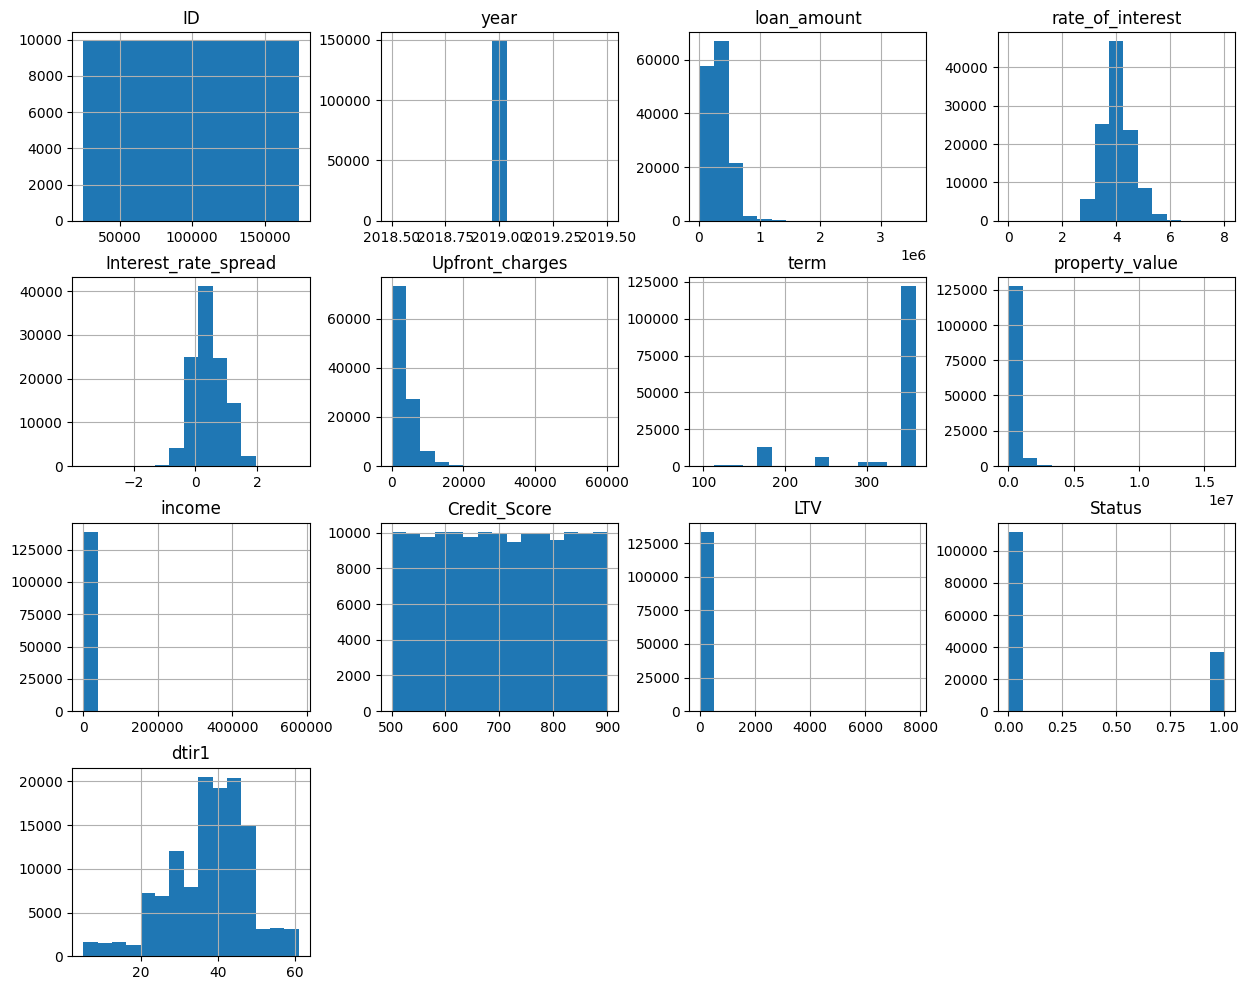

In [11]:
# ------ UNIVARIATE ANALYSIS -------

# Histograms for numerical features
fig, ax = plt.subplots(figsize=(15,12))

df_num.hist(bins=15, ax=ax)
plt.show()

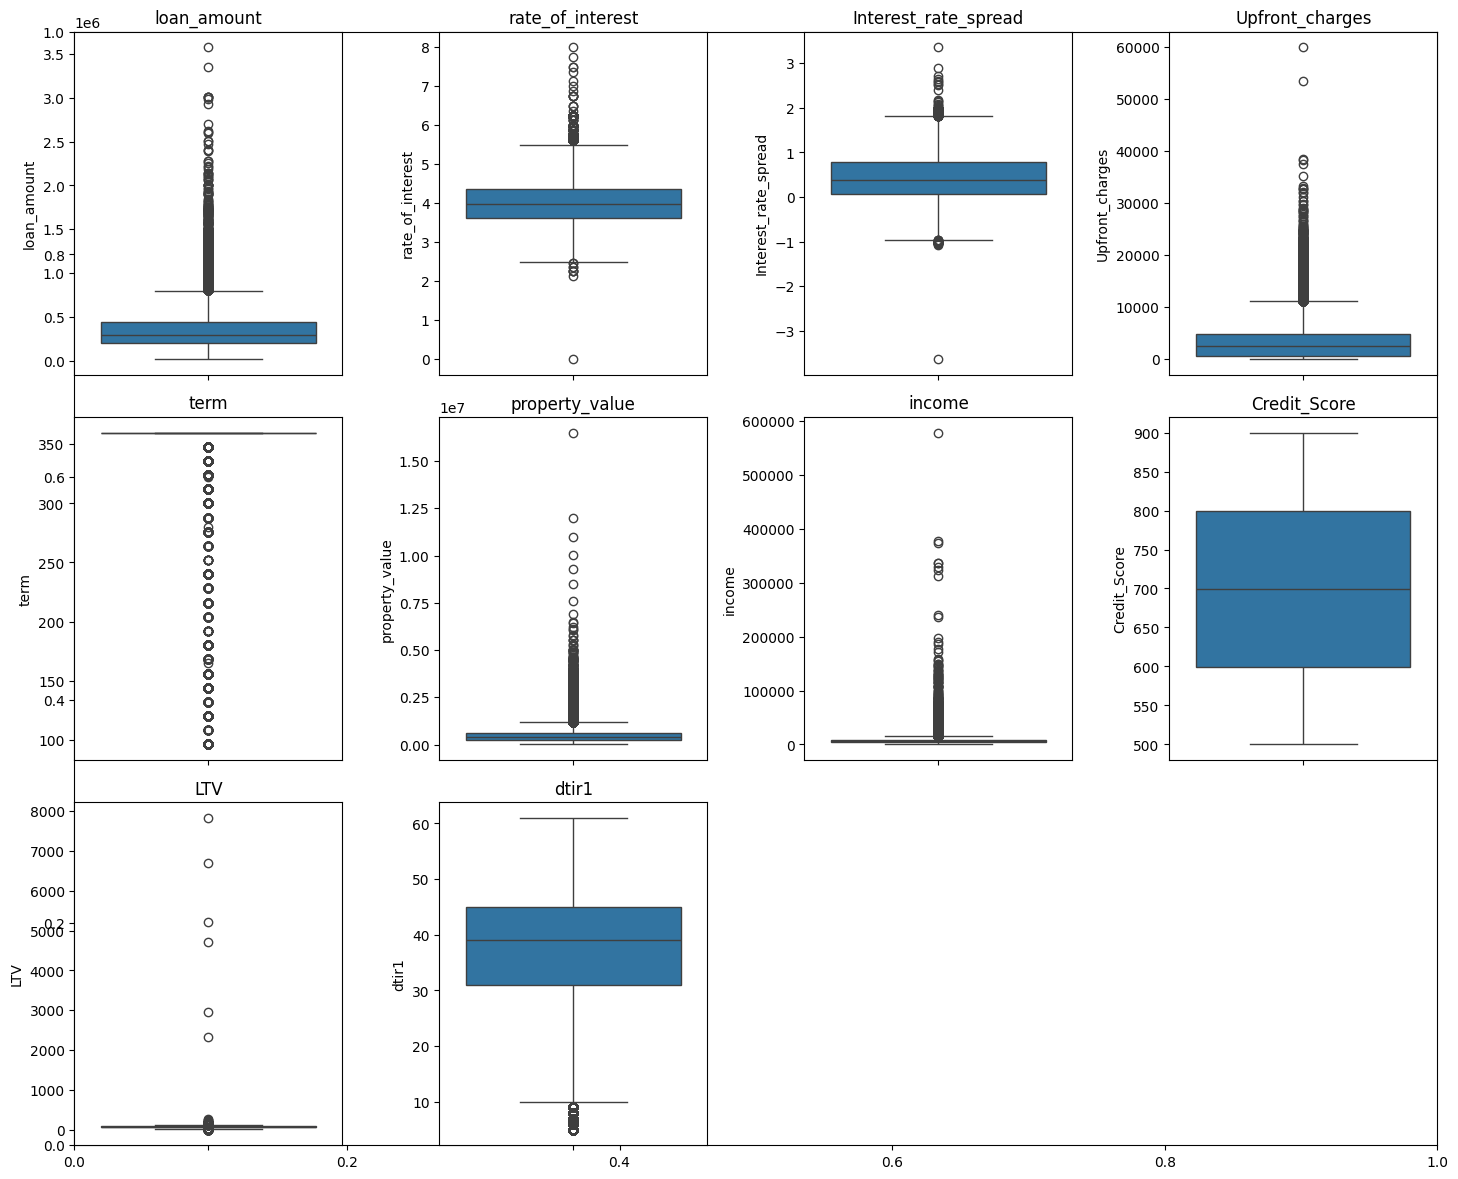

In [12]:
# ------ OUTLIER DETECTION -------

# numeric columns list
imp_numerical_cols = [
    'loan_amount', 
    'rate_of_interest', 
    'Interest_rate_spread',
    'Upfront_charges', 
    'term', 
    'property_value', 
    'income', 
    'Credit_Score',
    'LTV', 
    'dtir1'
]

# Boxplots for outlier detection
fig, ax = plt.subplots(figsize=(15,12))

for i, col in enumerate(imp_numerical_cols):
    plt.subplot(3, 4, i+1)
    sns.boxplot(y=df_num[col])
    plt.title(f'{col}')
    
plt.tight_layout()
plt.show()


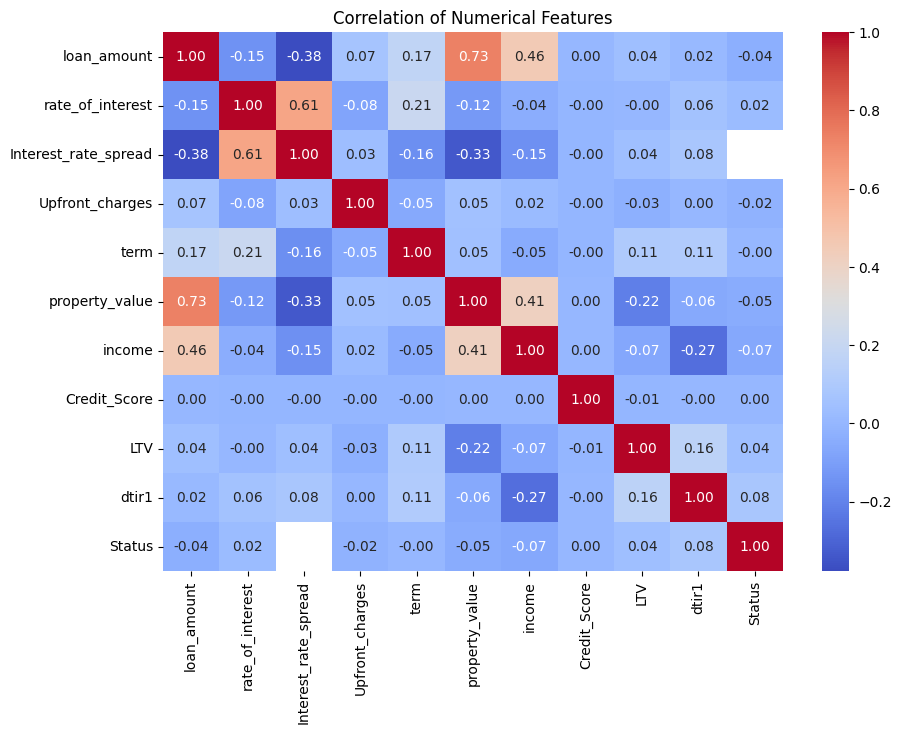

In [13]:
# ----- MULTIVARIATE ANALYSIS -------

# numeric columns list
imp_numerical_cols = [
    'loan_amount', 
    'rate_of_interest', 
    'Interest_rate_spread',
    'Upfront_charges', 
    'term', 
    'property_value', 
    'income', 
    'Credit_Score',
    'LTV', 
    'dtir1',
    'Status'
]

# correlation matrix
corr = df[imp_numerical_cols].corr()

# correlation heatmap
plt.figure(figsize=(10,7))

sns.heatmap(
    corr, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm'
)

plt.title("Correlation of Numerical Features")
plt.show()

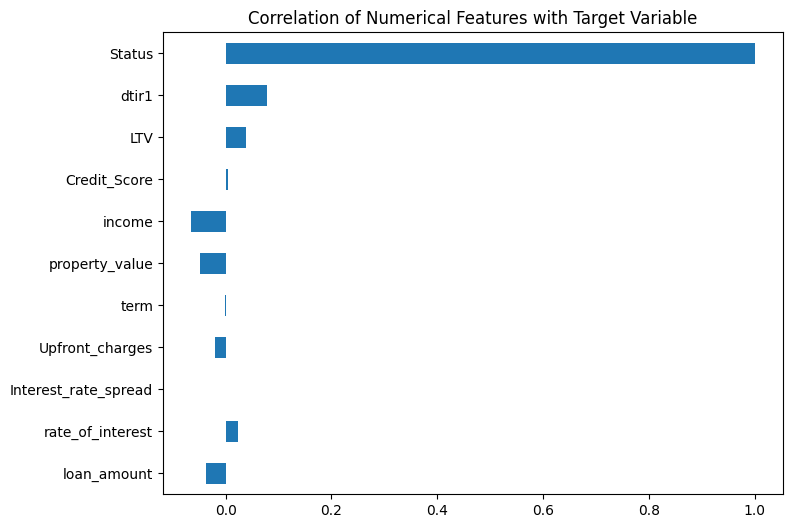

In [14]:
# ------ CORRELATION WITH TARGET VARIABLE -------

# numeric columns list
imp_numerical_cols = [
    'loan_amount', 
    'rate_of_interest', 
    'Interest_rate_spread',
    'Upfront_charges', 
    'term', 
    'property_value', 
    'income', 
    'Credit_Score',
    'LTV', 
    'dtir1',
    'Status'
]

fig, ax = plt.subplots(figsize=(8,6))
df[imp_numerical_cols].corr()['Status'].plot(kind='barh', ax=ax)
plt.title("Correlation of Numerical Features with Target Variable")
plt.show()

### Insights from Numerical Analysis:

- There is Significant Missing Data
    - Upfront_Charges = 26.7%
    - Interest_rate_spread = 24.6%
    - Rate_of_interest = 24.5%
    - dtir1 = 16.2%
    - amongst others...

- Extreme Outlier in **LTV** (Loan-to-Value)
    - max: 7831 is too extreme
    - Do: Cap to 100%

- There is large number of `Low income` applicants. The **Income** feature is right skewed
- Other `Right Skewed` Features are: 
    - Upfront_charges
    - Property_value
    - loan_amount
- DO THESE DURING PREPROCESSING:
    - Drop Features : `ID`, `year` (No predicting power)
    - Cap `LTV` to 150
    - **Missing Value Imputation**
        - rate_of_interest (median)
        - interest_rate_spread (median)
        - upfront_charges
        - dtir1 (median)
    - **Log Transformation**
        - loan_amount
        - property_value
        - income
        - upfront_charges
        

## Categorical Feature Analysis ---

In [15]:
# ------ CATEGORICAL FEATURE ANALYSIS -------

# categorical columns
categorical_cols = df.select_dtypes(include='object').columns

categorical_cols

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Security_Type'],
      dtype='object')

In [16]:
# categorical dataframe 

df_cat = df[categorical_cols]
df_cat.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,...,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,EXP,CIB,25-34,to_inst,south,direct
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,not_neg,not_int,...,sb,pr,home,1U,EQUI,EXP,55-64,to_inst,North,direct
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,neg_amm,not_int,...,sb,pr,home,1U,EXP,CIB,35-44,to_inst,south,direct
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,EXP,CIB,45-54,not_inst,North,direct
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,CRIF,EXP,25-34,not_inst,North,direct


In [17]:
# Information Summary

df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   loan_limit                 145326 non-null  object
 1   Gender                     148670 non-null  object
 2   approv_in_adv              147762 non-null  object
 3   loan_type                  148670 non-null  object
 4   loan_purpose               148536 non-null  object
 5   Credit_Worthiness          148670 non-null  object
 6   open_credit                148670 non-null  object
 7   business_or_commercial     148670 non-null  object
 8   Neg_ammortization          148549 non-null  object
 9   interest_only              148670 non-null  object
 10  lump_sum_payment           148670 non-null  object
 11  construction_type          148670 non-null  object
 12  occupancy_type             148670 non-null  object
 13  Secured_by                 148670 non-null  

In [18]:
# ------- MISSING VALUES IN CATEGORICAL FEATURES -------
missing_cat = df_cat.isnull().sum() / len(df_cat) * 100

# sort missing values
missing_cat.sort_values()

Gender                       0.000000
loan_type                    0.000000
open_credit                  0.000000
Credit_Worthiness            0.000000
business_or_commercial       0.000000
construction_type            0.000000
lump_sum_payment             0.000000
interest_only                0.000000
total_units                  0.000000
Secured_by                   0.000000
credit_type                  0.000000
occupancy_type               0.000000
Region                       0.000000
Security_Type                0.000000
co-applicant_credit_type     0.000000
Neg_ammortization            0.081388
loan_purpose                 0.090133
age                          0.134526
submission_of_application    0.134526
approv_in_adv                0.610749
loan_limit                   2.249277
dtype: float64